In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"

df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [3]:
df.shape

(55, 2)

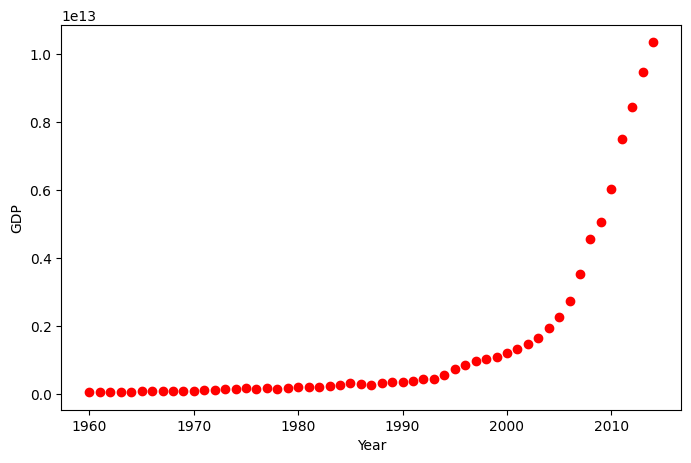

In [4]:
plt.figure(figsize=(8,5))
x_data, y_data = (df['Year'].values,df['Value'].values)
plt.plot(x_data,y_data,'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [5]:
x = np.asanyarray(df[['Year']] / df.Year.max())
y = np.asanyarray(df[['Value']] / df.Value.max())

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x,y)

y_pred = model.predict(x)


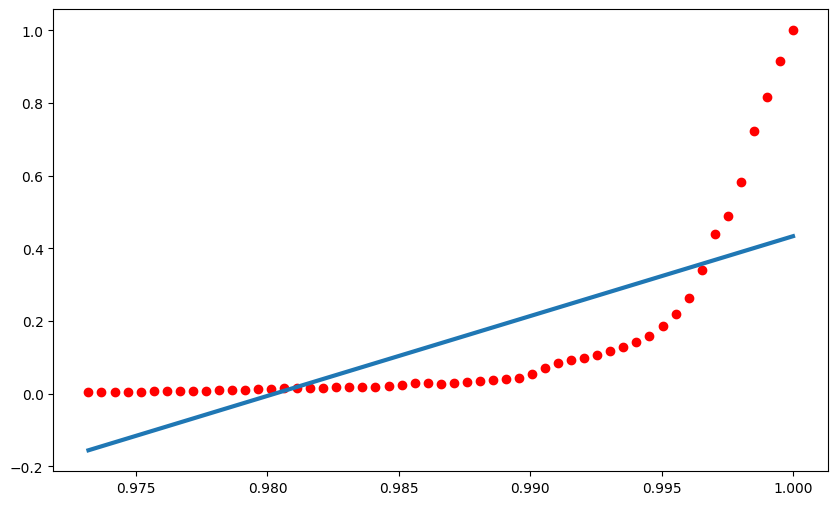

In [7]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro',label = 'data')
plt.plot(x,y_pred,linewidth=3.0,label='fit')
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_pred,y)

In [9]:
print(f"{MAE = }")

MAE = 0.12657979406214762


In [10]:
x[0]

array([0.97318769])

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5,include_bias=False)
x_poly = poly_features.fit_transform(x)

In [42]:
x_poly[0]

array([0.97318769, 0.94709427, 0.92170048, 0.89698756, 0.87293725])

In [43]:
model.fit(x_poly,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = model.predict(x_poly)

In [45]:
MAE = mean_absolute_error(y_pred,y)

In [46]:
print(f"{MAE = }")

MAE = 0.009253895896750778


In [48]:
0.12657979406214762 / 0.009253895896750778

13.678540959877475

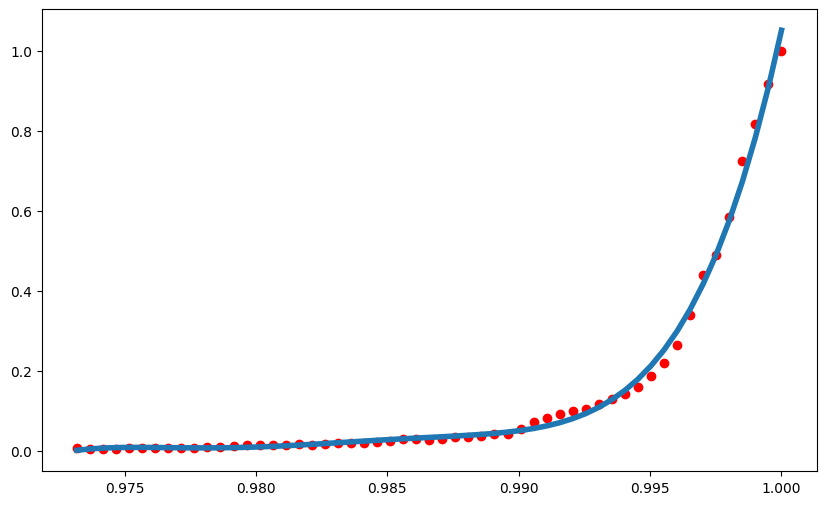

In [49]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro',label = 'data')
plt.plot(x,y_pred,linewidth=4.0,label='fit')
plt.show()